# CS130 - Assignment 1
## R Competency

For this assignment, you will analyse UN Peacekeeping data.

As you may already know, at any given time, the UN is involved with many peacekeeping missions around the world. 
Almost all member-states contribute personnel to those missions. There are five types of personnel: experts on mission, troops, staff officers, individual police, and formed police units. 

In its efforts to involve more women in its global operations, the UN reports, monthly, the gender of each person 
sent on a mission. https://peacekeeping.un.org/en/women-peacekeeping

You can access the dataset here: https://tinyurl.com/UNpckpdata

For this assignment, you will have to load, process, analyse, and visualise the data.
In the process you’ll also learn more about UN peacekeeping, and how a little data science applied to publicly-available data sets can illuminate interesting contemporary issues like global conflict and gender inequality.
Many, many, many thanks to Minerva alum Zdravko Varbanov for devising this assignment based on his consulting work for Margaret Jenkins. 

**Remember:** Google is your best friend! You can look up how to solve anything and how to fix issues. 
Also, it may be helpful to open the dataset in Excel or Google Sheets and use the filtering options there to check your work. 

## Step 1: Load dataset 
*Note: This step may take several seconds to complete.*

In [127]:
# Load Dataset
data <- read.csv("https://tinyurl.com/UNpckpdata")

## Step 2: Check For Missing Values
Check each column for missing values and/or NAs and drop the observations that have them.
**HINT:** Use the function na.omit after dealing with all the blanks by setting them to NAs. 

In [128]:
data_new <- replace(data, data == "", NA)
na.omit(data_new)

,Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
1,427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,31/07/2020
2,427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,31/07/2020
3,427905,ARG,32,Argentina,UNFICYP,Troops,15,219,31/07/2020
4,427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,31/07/2020
5,427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,31/07/2020
6,427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,31/07/2020
7,427909,ARG,32,Argentina,UNVMC,Individual Police,5,7,31/07/2020
8,427910,ARM,51,Armenia,MINUSMA,Staff Officer,0,1,31/07/2020
9,427911,ARM,51,Armenia,UNIFIL,Troops,2,30,31/07/2020
10,427912,ARM,51,Armenia,UNIFIL,Staff Officer,0,1,31/07/2020


## Step 3: Change Class
Change the object class of the column containing the dates to object of “class” = Date.

**HINT:** Use the function as.Date(foo_new$Last_Reporting_Date,"%d/%m/%Y")
   
https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/as.Date

In [129]:
data_new$Last_Reporting_Date <- as.Date(data_new$Last_Reporting_Date,"%d/%m/%Y")
head(data_new)

Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,2020-07-31
427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,2020-07-31
427905,ARG,32,Argentina,UNFICYP,Troops,15,219,2020-07-31
427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,2020-07-31
427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,2020-07-31
427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,2020-07-31


## Step 4: Women Serving In March 2020
Take a look at this infographic from the UN that outlines its goals to make its personnel more diverse:
https://peacekeeping.un.org/sites/default/files/uniformed_women_infographic_150520_updated.pdf

It shows the percentage of women each personnel type should include by 2028 across all missions. Take a look at the % goal in the barplot entitled ‘WOMEN SERVING IN FORMED POLICE UNITS’ — 20%+ across all missions by 2028. 

Was that goal achieved for the **March 2020**? Explain, and in 1-2 sentences, please discuss the policy implications.

In [136]:
subset_march <- subset(data_new, data_new$Last_Reporting_Date == "2020-03-31")
subset_policeunit <- subset(subset_march, subset_march$Personnel_Type == "Formed Police Units")
head(subset_policeunit)
female <- sum(subset_policeunit$Female_Personnel)
male <- sum(subset_policeunit$Male_Personnel)
total <- female + male
x <- female*100/total
'Women Percentage In Formed Police Units For March 2020:'
print(paste(round(x,2),'%'))

,Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
4035,423888,BGD,50,Bangladesh,MINUSMA,Formed Police Units,43,237,2020-03-31
4040,423893,BGD,50,Bangladesh,MONUSCO,Formed Police Units,77,103,2020-03-31
4044,423897,BGD,50,Bangladesh,UNAMID,Formed Police Units,29,110,2020-03-31
4067,423920,BEN,204,Benin,MINUSMA,Formed Police Units,5,133,2020-03-31
4122,423975,BFA,854,Burkina Faso,MINUSMA,Formed Police Units,10,130,2020-03-31
4128,423981,BFA,854,Burkina Faso,UNAMID,Formed Police Units,7,133,2020-03-31


[1] "Women Percentage In Formed Police Units For March 2020:"

[1] "10.88 %"


### Policy Implications

If we would expect the 20%+ of women in formed police units personnel, then after 2019, the percentage should increase on (20%-10.8%)/(2028-2019) = 1.02% => we would expect 11.82% of female personnel by March 2020. As calculated above, the rate of women for March 2020 is 10.88% indicating it almost did not change compared to 2019. Therefore, the policy implications did not work for March 2020.

## Step 5: 
To drive the point home, replicate the bar plot from the previous step (the one entitled 'WOMEN SERVING IN FORMED POLICE UNITS'), but this time include the **March 2020** percentage as a new bar on the chart. 
Do not worry too much about making the plots look the same aesthetically. 

**Hint:** Use function ggplot2 to build the bar plot.
   http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization

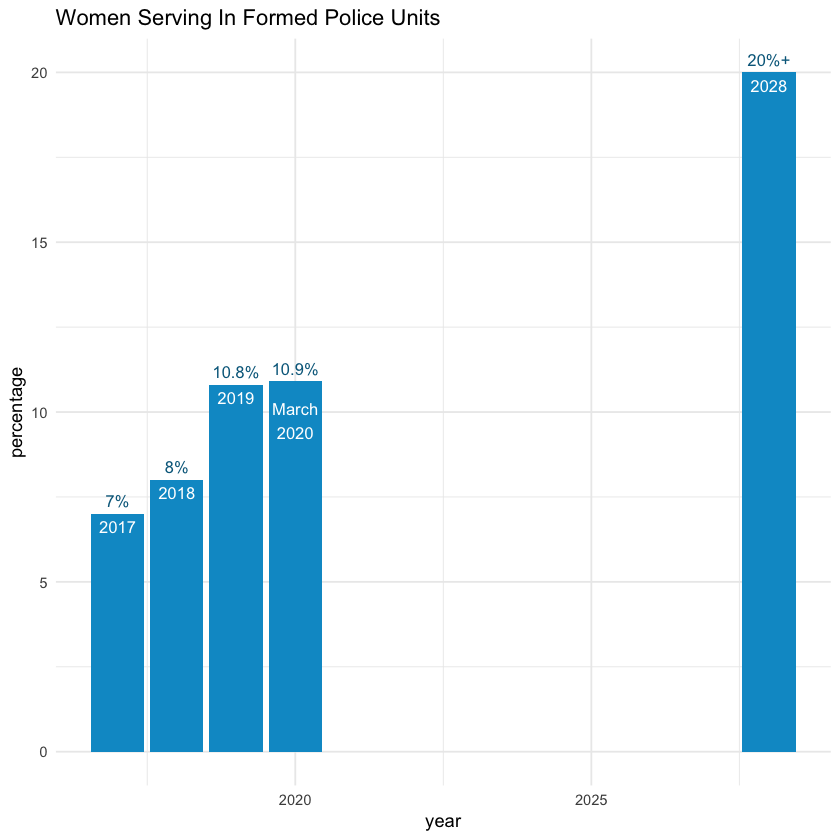

In [141]:
library(ggplot2)
library(RColorBrewer)

data_new$Last_Reporting_Date <- as.Date(data_new$Last_Reporting_Date, format = "%Y%m%d")
data_new$Last_Reporting_Date <- format(data_new$Last_Reporting_Date, "%Y")

# create vectors for years and percentages
year <- c(2017,2018,2019,2020,2028)
outsidetext <- c("7%", "8%", "10.8%", "10.9%", "20%+")
insidetext <- c ("2017", "2018", "2019", " March 
2020", "2028")
percentage <- c(7, 8, 10.8, 10.9, 20)

df <- data.frame(cbind(year, percentage))

p <- ggplot(data=df, aes(x=year, y=percentage)) +
  geom_bar(stat="identity", fill = "deepskyblue3") +
  geom_text(aes(label=outsidetext), vjust=-0.6, size=3.5, color = "deepskyblue4") +
  geom_text(aes(label=insidetext), vjust=1.6, color="white", size=3.5) + 
  ggtitle("Women Serving In Formed Police Units") +
  theme_minimal()
p

## Step 6: 

Now let’s focus on a subset of countries: the US, South Korea, and India. Here are the ISO Alpha 3 Codes for each of the countries: 

**Country  |  ISO Alpha 3 Code (‘ISOCode3’ in the dataset)**

The US   ->    USA

South Korea -> KOR

India    ->   IND

Write a function that takes as input a country’s ISO code and returns (in any nice-looking format):
(a) a list of all the unique missions that the country has sent personnel to for the whole timeline of the dataset 
(b) the number of unique missions that the country has sent personnel to for the whole timeline of the dataset 

**HINT:** See this Stack Overflow thread and refresher on how to build functions:
   https://tinyurl.com/y6b6fhg9 (how to build functions)
https://www.tutorialspoint.com/r/r_functions.htm#:~:text=In%20R%2C%20a%20function%20is,be%20stored%20in%20other%20objects.

Create a loop that cycles through each of the Minerva rotation countries’ ISO codes and reports back the results of the function above. 

**Note:** It is likely that this dataset was populated manually. Therefore, some typos exist that we need to address.
this is part of the data cleaning process. In this case, some Mission Names have trailing spaces (ex.: "UNSMIL   ") that we need to remove. Otherwise, we run the risk of double counting them. Before you run the loop that would cycle through each of the Minerva countries, make sure to remove the trailing spaces from the Mission Names column. 

**See this HINT for help:** https://stat.ethz.ch/R-manual/R-devel/library/base/html/trimws.html 

Express a conclusion and a tentative policy implication based upon your results (a few sentences is sufficient).

In [155]:
# Clean Data
data_new$Mission_Acronym <- trimws(data_new$Mission_Acronym, which = c("both"))

df <- data_new

# Create Function to Find Unique Missions and Count Them
get_the_mission <- function(code) {
    subset = df[df$ISOCode3==code,]
    find_unique = unique(subset[c("Mission_Acronym")])
    mission_list <- list(find_unique$Mission_Acronym)
    print("The country has sent personnel to the following missions:")
    print(mission_list)
    number <- length(mission_list[[1]])
    print(paste('The number of unique missions:', number))
}

In [156]:
# Loop Through Rotation Countries For Unique Missions
Minerva_Rotation <- list("USA", "KOR", "IND")
for (i in Minerva_Rotation) {
    print(i)
    get_the_mission(i)
}

[1] "USA"
[1] "The country has sent personnel to the following missions:"
[[1]]
 [1] "BINUH"     "MINUSCA"   "MINUSMA"   "MONUSCO"   "UNMISS"    "UNSMIL"   
 [7] "UNTSO"     "MINUJUSTH" "UNMIL"     "MINUSTAH"  "UNAMA"     "MINURCAT" 
[13] "UNMIS"     "UNMIK"     "UNIOSIL"   "UNAMID"    "UNMIT"     "UNOTIL"   
[19] "UNAMSIL"   "UNMISET"   "UNIKOM"    "UNMEE"     "UNMIBH"   

[1] "The number of unique missions: 23"
[1] "KOR"
[1] "The country has sent personnel to the following missions:"
[[1]]
 [1] "MINURSO"   "UNAMID"    "UNIFIL"    "UNMISS"    "UNMOGIP"   "UNMHA"    
 [7] "MINUJUSTH" "UNMIL"     "UNOCI"     "MINUSTAH"  "UNMIT"     "UNISFA"   
[13] "UNMIS"     "UNMIN"     "UNAMA"     "UNMISET"   "UNFICYP"  

[1] "The number of unique missions: 17"
[1] "IND"
[1] "The country has sent personnel to the following missions:"
[[1]]
 [1] "MINURSO"   "MONUSCO"   "UNDOF"     "UNFICYP"   "UNIFIL"    "UNISFA"   
 [7] "UNMISS"    "UNTSO"     "UNSOM"     "MINUJUSTH" "MINUSTAH"  "UNMIL"    
[13] "UNA

### Conclusion



As observed, India has sent personnel to the largest amount of missions - 26, while Korea has allocated forces only to 17. This implies the more armforce the country has, the more help they can allocate. Also, there could have been a decrease in sending personnel due to COVID-19 pandemics: countries make sure people stick to quarantine; thus, they allocate some forces to avoid protests.

A policy to implement should be based on #rightproblem. We should find the cause why some countries allocate less personnel to the missions and then solve it based on each case. For instance, the country might not have enough personnel, funding or there might be a war going on (e.g. Russia invading Ukraine).